<h1><center>
BUDT704 Project Report<br>
Employee Attrition Factors Analysis <br> 
</center></h1>

<h3><center>
Group 09 (Whistle Blowers): Rachel  Mary Pothen, Dhairya Parekh, Diyang Lyu, Guanqun Gao, Nikhita Reddy, Aashutosh Avasthi 
</center></h3>


# Introduction

'Employee Attrition' is currently one of the most pressing concerns organizations face in terms of human resource management. Employee attrition occurs when employees leave the organization voluntarily or retire, resulting in an unexpected downsizing of the company. Considering employees are the organization's backbone, the company's performance is greatly influenced by the employee's quality. Employee attrition has serious consequences for the company's growth and workforce since training new employees is costly in terms of both money and time, and it results in the loss of experienced personnel, which has a negative influence on productivity and profit.
<br>

![Employee Attrition](https://i.imgur.com/5z9SVz5.png)

### Questions of Interest

Organizations can avoid employee attrition by monitoring and regulating the factors that trigger it. This project assists in determining the factors that contribute to employee attrition in a company. The scope of this project, answers the following questions that could help restrain employee attrition:  
- Which department has the highest level of employee attrition?  
- What are the key parameters that HR needs to monitor to prevent employee attrition?  
- Can a pattern be observed amongst key parameters to identify the likelihood for employee attrition?

The outcomes of this study can equip HR teams to make appropriate adjustments in the company's policies ahead of time, decreasing the uncertainty associated with attrition to a certain extent. This project identifies the most common causes of employee attrition intended to facilitate HR departments in taking proactive measures to improve employee retention

### Dataset Description

The dataset employed for processing and analysis, available as an open-sourced dataset provided by IBM was acquired from Kaggle. It consists of columns containing attrition information and data regarding different parameters corresponding to an employee in the company such as age, gender, job role, salary, etc. The dataset spans over 1470 rows and 35 columns containing 51,450 data points in total. 

### Getting to work

In [1]:
#Importing necessary libraries for the project 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import train test split from sklearn
from sklearn.model_selection import train_test_split
# For modeling
from sklearn.ensemble import GradientBoostingClassifier
# Import evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# For SVM model preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# For modeling
from sklearn.svm import SVC

#### Data Acqusition 

- Downloading and Importing the 'IBM HR Analytics Employee Attrition & Performance' dataset file (.csv) from Kaggle (https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

In [2]:
# using pandas .read_csv method to read the data from Drive folder location

df_employee = pd.read_csv('HR-Employee-Attrition.csv') 

#### Overview of the imported dataset
- Using pandas' `head()` method we can view the dataset for the first five observations for all its variables or column attributes
- With the `info()` method we get a summary of the non-null records across the dataset by their column attributes and the data type for the column attributes. This information helps in planning for the data cleaning phase
- Finally, we use the `describe()` method to more information about the numeric data observation points in the dataset. Not all the results will be helpful but some information can be very useful to gain an overview of the numeric fields

In [3]:
# displying the top 5 observations

df_employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# .info() to generate a report for non null fields and their data-types by each attribute column

df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# .describe() method will help us obtain insights about the numeric data of the dataset such as spread and 
# statistical overview which will be helpful later

df_employee.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Choice for Heavier Grading on Data Analysis

This project relies heavily on data analysis as the goal of the project is to identify factors that cause attrition which is obtained through an extensive thorough analysis of the various employee and their potential attrition parameters. The analysis conducted goes beyond the basics as it dwells into the various dimensions associated with employee attrition. Along with determining the parameters that are strongly correlated with attrition and representing the same through a heatmap, the department with the highest attrition rate is identified as well. Further, all the features related to an employee are analyzed and visualized as per their importance in influencing employee attrition rate. These analyses help in inferring the aspects that most likely lead to attrition. Additionally, a model is built to predict whether an employee is attrited or not based on this parameter analysis.

# Data Processing

### Data Cleaning
For data cleaning, we have implemented the following steps:
- Dropping columns that have only one response observation since constant values will add no value to analysis or can be derived from other data present in the dataset to reduce redundancy.
- Dealing with null values (if any) to improve the quality of the dataset for more accurate analysis.
- Combining information obtained from `head()` and `info()` methods and operating on column attributes that need to be converted from object data type to binary data allowing faster processing for those fields.

We have two columns that do not contribute any value to our analysis viz. ‘EmployeeCount’ and ‘Over18’. The values in the column 'EmployeeCount' is always 1 and since all the employees are above the age of 18, all the values in the column ‘Over18’ are 1. Therefore, we have dropped them

In [6]:
# EmployeeCount is always 1, representing the employee themselves and all the employees on record have an age
# over 18 years.

df_employee.drop(['EmployeeCount', 'Over18'], axis=1, inplace = True)

Then we check for null values in the dataset

In [7]:
# Checking for null values in the dataset for all column attributes

print(df_employee.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

We do the transformation to make some of the data more meaningful. For Attrition, Gender and Overtime, they just have two results: yes or no, so we can transform them into binary values. First, we assign these three columns into category types, then we select them, convert these categories to numbers and specify ‘categorical’. For example, for Attrition, 0 = no, 1 = yes, for Gender, 0 = female, 1 = male, for Overtime, 0 = no, 1 = yes. By default, the categories are ordered alphabetically

### Data Transformation

In [8]:
# Converting the columns 'Attrition' to binary values

# assigning category columns
df_employee['Attrition'] = df_employee['Attrition'].astype('category')

# selecting categorical data columns
cat_columns = df_employee.select_dtypes(['category']).columns

# assigning binary values to the selected dataset. For Attrition, 0 = No, 1 = Yes
df_employee[cat_columns] = df_employee[cat_columns].apply(lambda x: x.cat.codes)

In [9]:
df_employee_new = df_employee.copy(deep=True)
df_employee_new

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [10]:
# making a new dataframe with all the object type column attributes
df_category = df_employee.select_dtypes(include='object')

# using the get_dummies method to to perform one hot encoding for all object-type column attributes
df_category_encoded = pd.get_dummies(df_category, drop_first=True)

# dropping the encoded columns from the database
df_employee.drop(list(df_category.columns), axis=1, inplace=True)

# Merging the encoded dataframe with the employee dataframe
df_employee = pd.concat([df_employee, df_category_encoded], axis=1)

# to view the changes, displaying the modified dataframe
df_employee

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,4,4,92,2,1,...,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,5,4,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,7,1,40,3,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,2061,3,41,4,2,...,1,0,0,0,0,0,0,1,0,0
1466,39,0,613,6,1,2062,4,42,2,3,...,0,0,0,0,0,0,0,1,0,0
1467,27,0,155,4,3,2064,2,87,4,2,...,0,0,1,0,0,0,0,1,0,1
1468,49,0,1023,2,3,2065,4,63,2,2,...,0,0,0,0,0,1,0,1,0,0


# Exploratory Data Analysis 

The cleaned and transformed data can now be processed and analyzed to gain insights and draw inferences regarding employee characteristics and factors leading to attrition. 

### Parameters strongly correlated with employee attrition: 
Employee parameters or characteristics that strongly influence attrition conditions among employees can be determined by analyzing each parameter's correlation with their corresponding attrition value. The parameters which tend to have a higher chance of causing employee attrition are more strongly correlated. This correlation can be determined using `corr()` as shown below.

In [11]:
# To determine the parameters that are strongly correlated with attrition

corr_df=pd.Series.to_frame(df_employee.corr()['Attrition'].sort_values(ascending=False).head(n=11))
corr_df.drop(index='Attrition', inplace=True)

The correlation values can be visualized to identify the top parameters that are most strongly correlated with employee attrition. The heat map displayed below represents the top 10 parameters and how strongly each is correlated to employee attrition.

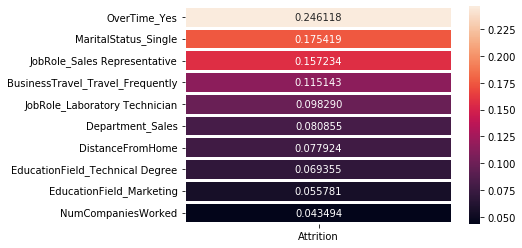

In [12]:
# Create a heat map that displays the correlation of numerous parameters with attrition

heat_map=sns.heatmap(corr_df, annot=True, fmt="f", linewidths=2)

### Observations

 - Our data shows strong positive relation between the overtime and attrition. Among employees who were doing overtime, 30.53% left the organization. The possible reason for strong positive correlation between attrition and overtime could be, employees are made to work long extra hours and are not fairly compensate
 - According to our data, there is strong positive correlation between single employees and attrition. Among employees who were single, 25.53% left the organization. The possible reason for such an observation could be that single employees are risk takers or it could be possible that they aren't looking for long term stability this early in their career
 - It is evident from the heatmap that there is strong positive correlation between frequent business travel and attrition. Maybe this could be because business travel could take a toll on the employee's wellbeing 

### Analyzing department with the highest attrition rate

For a company to understand the issues due to which they are losing out on employees, one of the key factors that they need to look into is the attrition rate amongst the various departments within the company. Departments with higher attrition rates could mean that the employees in those departments are facing issues due to which they leave the company. Understanding if the problem lies in a particular department, can help companies better investigate the reasons for attrition.

In [13]:
def df_department(x): 
    
    attrition = df_employee_new.groupby(x).agg({'Attrition':['size','sum','mean']})   #Grouping the total number of employees in a department and the number of employees that have left as per the departments
    attrition.columns = [' '.join(col).strip() for col in attrition.columns.values]   #Splitting the columns
    attrition = attrition.reset_index()
    attrition['Attrition mean'] = attrition['Attrition mean']*100        #Calcuating the percentage of attrition for each department
    attrition.columns = [x, 'Total Number of Employees in the Department','Total Number of Employees in the Department that left',        #Renaming the columns
                       '% Attrition in the Department'] 
    return attrition

In [14]:
def graph (x, y = 'bar', z = 0):
    attrition=df_department(x)        #Passing the function to the variable
    figure, axis1 = plt.subplots()    #Unpacking the tuple
    axis2 = axis1.twinx()             #Adding a secondary axis
    attrition.set_index(attrition[x], drop=True, inplace=True)
    attrition['Total Number of Employees in the Department'].plot(kind = y, stacked = True, ax = axis1,  #Plotting a bar graph that shows the total number of employees in every department
                                   colormap = 'plasma', rot = z)                                         
    attrition['% Attrition in the Department'].plot(use_index = False,                                    #Plotting a line that shows the attrition rate in every department
                                                         kind = 'line', ax = axis2, colormap='Spectral')
    plt.title('Attrition Rate across all the Departments')       
    axis1.set_xlabel(x)
    axis1.yaxis.label.set_color('blue')                       
    axis1.set_ylabel("Total Number of Employees in the Department")
    axis2.set_ylabel("% Attrition in the Department")
    axis2.yaxis.label.set_color('red')
    plt.tight_layout()
    plt.show()

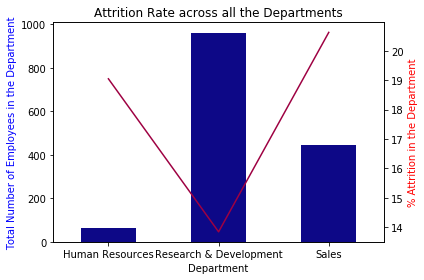

In [15]:
graph(x = 'Department')  #Plotting the graph

From the above figure, we can infer that the Sales department, has the highest attrition rate amongst all the departments. The company can use this information to understand the causes of attrition. The work culture, employee satisfaction, salary, and other factors of employees working for this department should be analyzed thoroughly to find out the underlying issues leading to attrition

### Predicting Employee Attrition:

The possibility of attrition for an employee can be predicted by analyzing the various parameters and their outcomes in terms of attrition. Machine Learning algorithms can be employed for this purpose. Gradient Boosting Machines and Support Vector Machines are two such supervised machine learning algorithms that can be used to predict if a certain employee will be attrited or retained. In this project, two models have been built based on these algorithms to train and test the data, whose accuracy is then determined and compared

### Model using Gradient Boosting Machines

The first model is built based on Gradient Boosting Machines. Gradient Boosting trains many models in a gradual, additive and sequential manner. In addition to this, it handles the weak learners in the decision tree better than other boosting algorithms.

**Importance in context of our model:**
- It helps to mitigate bias error of the model since the target variable has an imbalance
- Helps identify the optimum value for n_estimators which helps in fine-tuning the model

#### Preparing data for the model training

In [16]:
# Making dataframe subsets for dependent and independent column attributes
X = df_employee.drop('Attrition', axis=1)
y = df_employee['Attrition']

In [17]:
# Splitting the data into 0.75-0.25 ratio for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y, shuffle=True)

#### Building the model

In [18]:
#Using Gradient Boosting to predict 'Attrition' and create the Trees to identify important features
gbm = GradientBoostingClassifier()

# Fitting the model
gbm.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### Training accuracy

In [19]:
y_train_pred = gbm.predict(X_train)

# Train Accuracy
print(f"Train Accuracy is: {round(accuracy_score(y_train, y_train_pred)*100, 2)}%")

Train Accuracy is: 96.01%


#### Testing accuracy

In [20]:
y_test_pred = gbm.predict(X_test)

# Train Accuracy
print(f"Test Accuracy is: {round(accuracy_score(y_test, y_test_pred)*100, 2)}%")

Test Accuracy is: 87.23%


#### Calculating Area Under the Curve (AUC) measure

In [21]:
y_train_score = gbm.predict_proba(X_train)[:,1]
print(f"AUC on train data: {round(roc_auc_score(y_train, y_train_score),4)}")

AUC on train data: 0.9866


In [22]:
y_test_score = gbm.predict_proba(X_test)[:,1]
print(f"AUC on test data: {round(roc_auc_score(y_test, y_test_score),4)}")

AUC on test data: 0.8098


### Observation

The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes. The model is definitely overfitting as we can see the vast difference between the train and test accuracy and AUC scores

### Understanding the Important Features from the dataset

Out of all the characteristics of an employee and the attributes relating to their workplace, some tend to have a more significant impact on an employee's decision to leave the company as compared to others. The importance of the parameters in contributing to employee attrition can be visualized as shown below.

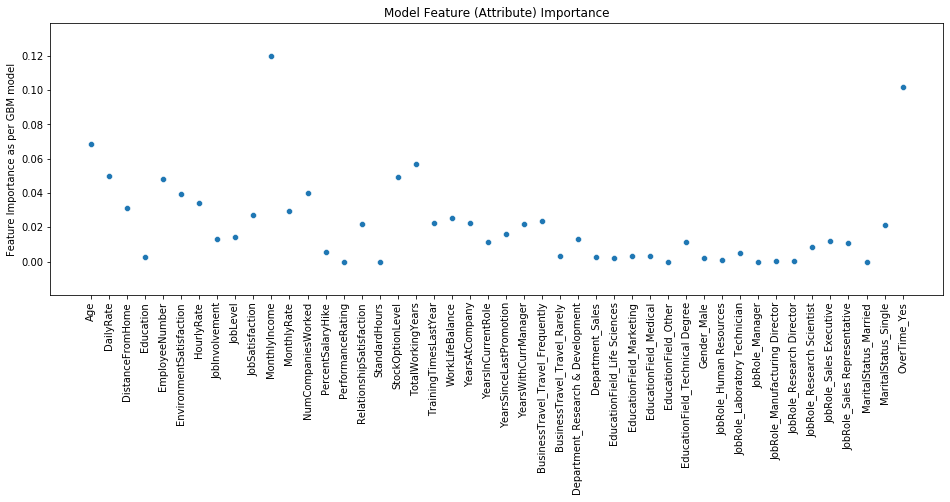

In [23]:
plt.figure(figsize=[16,5])
sns.scatterplot(x=X_train.columns.values, y=gbm.feature_importances_, palette="deep")
plt.title("Model Feature (Attribute) Importance")
plt.ylabel("Feature Importance as per GBM model")
plt.xticks(rotation=90)
plt.show()

### Observation

The above scatter plot shows the various parameters and the extent to which each of them plays a part in causing employee attrition. 
- It is evident that an employee's monthly salary and they are having to work overtime are the most important factors contributing to employee attrition.
- Employee Age, their available stock options, and total years with the company also are important factors.

## Model using Support Vector Machines

The second model is built using Support Vector Machines. SVMs are a sort of generalized linear model that can be used to solve problems like pattern classification and function approximation. In SVM alogrithm, data items are plotted as points in n-dimensional space (where n is a number of features in the dataset). Then classification is performed by finding the hyperplane that differentiates the classes very well. A non-parametric approach is used to train these models on a dataset with no prior knowledge of the data distribution.

**Benefits of the SVM model:** 
 - It is more effective in high dimensional data classifications.
 - It is also memory efficient, as it uses susbet of training points in the decision function (called support vectors)

#### Preparing data for modeling

In [24]:
# Making dataframe subsets for dependent and independent column attributes
X=df_employee.drop(['Attrition'],axis =1)
y=df_employee['Attrition']
# Standardizing independent features
sc = StandardScaler()
X = sc.fit_transform(X)

In [25]:
# Splitting the data into 0.75-0.25 ratio for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

#### Building the model

In [26]:
# Fitting the data to extract the best fit hyperplane and using Support Vector Machine to predict 'Attrition'
svc=SVC(kernel='linear') 
model=svc.fit(X_train,y_train)
model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Testing Accuracy

In [27]:
# Test Accuracy
y_predict=model.predict(X_test)
print(f'SVM Model Accuracy: {round(accuracy_score(y_test,y_predict)*100,2)}%')

SVM Model Accuracy: 88.59%


#### Observation

It can be observed from the accuracy results of the above two models that predictions made by Support Vector Machine are more accurate than the predictions made by Gradient Boosting Classifier

#### Inference

The training dataset has large number of features, so it is more likely that the data is linearly separable in high dimension. The possible reason for SVM performing better than Gradient Boosting Classifier is that it is more effective with high dimensional data classification and linearly separable datapoints

## Putting the model to work 

As the accuracy for Support Vector Machines based prediction is more than that of Gradient Boosting Classifier, the model built on SVM will be used to predict if an employee more likely to leave or stay with the organization based on their corresponding parameters.  Test data of an employee is loaded and fed to the model to determine employee attrition. Based on the employee related information, the model will predict if the employee will be attrited or retained.

#### Loading the test data to determine employee attrition

In [28]:
# Loading the testinig dataframe
test_dataframe = pd.read_csv('./FutureEmployeesData.csv') 
test_dataframe

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,25,1000,5,2,1,1,94,2,2,4,...,0,0,0,0,0,1,0,0,1,1


#### Running the model on the test dataframe, to determine employee attrition

In [29]:
# Runnig model on test dataframe
test_dataframe= sc.fit_transform(test_dataframe)
prediction = model.predict(test_dataframe)
if prediction ==0:
    print('The employee will be retained')
else:
    print('The employee will be attrited')

The employee will be retained


### Observation

Model built using SVM could be used by HR team to predict employee attrition with around 88.58% accuracy. This prediction would help them in employing long-term workforce planning strategies to manage attrition so that it doesnt impact the organization

# Conclusion

To sum it up, the core motive of this project is to help the HR team in curbing employee attrition using data-driven insights. Initially, an exploratory analysis was done to understand the data better and to extract the features that are strongly correlated to the attrition.

Using Gradient Boosting Classifier, the features that contributed highly to the attrition were abstracted. However, the accuracy of the model was not good enough (86.68%).  To augment the accuracy and to make better predictions about attrition, the SVM model was created. It improved the test prediction accuracy to 88.58% and the model was able to predict the attrition. 

Using the learnings from the project, the HR team will be better positioned in taking proactive decisions to reduce financial, organizational, and other risks caused due to unexpected employee attrition.